In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.datasets import boston_housing

In [2]:
(x_train,y_train),(x_test,y_test) = boston_housing.load_data()

In [3]:
print("Traing data shape: ",x_train.shape)
print("Testing data shape: ",x_test.shape)

Traing data shape:  (404, 13)
Testing data shape:  (102, 13)


In [4]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [5]:
model = Sequential([
    Input(shape=(x_train.shape[1],)),  # Explicit input layer
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')  # Linear output for regression
])

In [6]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [7]:
history = model.fit(x_train_scaled, y_train, epochs=100, validation_split=0.2, verbose = 0)

In [ ]:
test_loss, test_mae = model.evaluate(x_test_scaled, y_test)
print(f"\nTest Mean Absolute Error: {test_mae:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 18.8797 - mae: 2.8762

Test Mean Absolute Error: 3.06


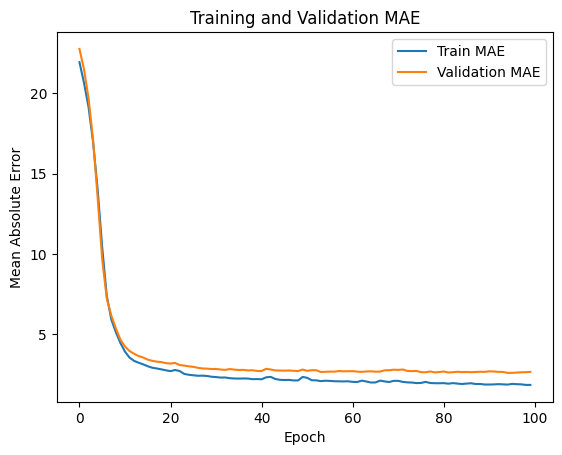

In [9]:
plt.plot(history.history['mae'],label='Train MAE')
plt.plot(history.history['val_mae'],label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

In [10]:
predictions=model.predict(x_test_scaled)
for i in range(5):
    print(f"Predicted: {predictions[i][0]:.2f}, Actucal: {y_test[i]}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted: 8.46, Actucal: 7.2
Predicted: 17.93, Actucal: 18.8
Predicted: 21.59, Actucal: 19.0
Predicted: 33.07, Actucal: 27.0
Predicted: 25.31, Actucal: 22.2


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,341 (118.52 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,228 (79.02 KB)